<a href="https://colab.research.google.com/github/ArtaliaVN/Data_mining/blob/main/DataMining_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
success_insight_dataset = pd.read_csv("/content/computed_insight_success_of_active_sellers.csv")

In [ ]:
summer_product_dataset = pd.read_csv("/content/summer-products-with-rating-and-performance_2020-08.csv")

**I.Data processing**

1. Process summer_product_dataset

summer_product_dataset.info()

Information which contains url, mono-info, unique data can be removed from the dataset

In [ ]:
for col_name in summer_product_dataset.columns:
    if summer_product_dataset[col_name].value_counts().shape != (1,) and (summer_product_dataset[col_name].value_counts().shape[0] < 5) and ((summer_product_dataset[col_name].value_counts().iloc[0] - summer_product_dataset[col_name].value_counts().iloc[1]) > 1200):
            print(col_name)

badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
shipping_is_express


In [ ]:
summer_product_dataset = summer_product_dataset.drop(columns=(['product_id', 'merchant_id','title', 'title_orig', 'currency_buyer', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'merchant_name', 'merchant_title', 'merchant_profile_picture', 'product_picture', 'product_variation_size_id', 'product_url', 'shipping_option_name', 'shipping_is_express', 'theme', 'tags', 'urgency_text', 'crawl_month', 'merchant_info_subtitle', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count','origin_country', 'inventory_total']))
summer_product_dataset.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,0,white,50,4,34,1.0,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,0,green,50,2,41,1.0,17752,3.899673,0
2,8.00,43,100,0,3.57,14,0,leopardprint,1,3,36,1.0,295,3.989831,0
3,8.00,8,5000,1,4.03,579,0,black,50,2,41,NaN,23832,4.020435,0
4,2.72,3,100,1,3.10,20,0,yellow,1,1,35,1.0,14482,4.001588,0


Transform object into number data type

In [ ]:
from sklearn import preprocessing
pc_fit = summer_product_dataset['product_color'].unique()
le = preprocessing.LabelEncoder()
le.fit(pc_fit)
summer_product_dataset['product_color'] = le.transform(summer_product_dataset['product_color'])

In [ ]:
summer_product_dataset.isnull().sum()

,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
product_color,0
product_variation_inventory,0
shipping_option_price,0


"has_urgency_banner" have integer to determine "yes or no" information thus it is save to assume null data to be 0, "urgency_text" only show if that product was limited or not which was already represent in previous column, thus it is save to remove it.

In [ ]:
summer_product_dataset['has_urgency_banner'] = summer_product_dataset['has_urgency_banner'].fillna(0)

In [ ]:
summer_product_dataset.isnull().sum()

,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
product_color,0
product_variation_inventory,0
shipping_option_price,0


"merchant_profile_picture", "product_url", "product_picture" are url to another websites which are unaccessable which will not significantly affect the dataset

"product_id", "theme" are attribute that only unique which will not affect the prediction result

"currency_buyer" only contains "EUR" which will not affect the prediction

For the rating, it is sufficient to only has "rating_count" and "rating"

In [ ]:
summer_product_dataset.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'product_color',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture'],
      dtype='object')

In [ ]:
summer_product_dataset.isnull().sum()

,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
product_color,0
product_variation_inventory,0
shipping_option_price,0


The final number of null data can be safely remove from the dataset as it does not greatly affect the result.

In [ ]:
summer_product_dataset = summer_product_dataset.dropna()
summer_product_dataset.isnull().sum()

,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
product_color,0
product_variation_inventory,0
shipping_option_price,0


In [ ]:
summer_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_count                  1573 non-null   int64  
 6   badges_count                  1573 non-null   int64  
 7   product_color                 1573 non-null   int64  
 8   product_variation_inventory   1573 non-null   int64  
 9   shipping_option_price         1573 non-null   int64  
 10  countries_shipped_to          1573 non-null   int64  
 11  has_urgency_banner            1573 non-null   float64
 12  merchant_rating_count         1573 non-null   int64  
 13  mer

In [ ]:
summer_product_dataset.describe()[1:].T.style.background_gradient(cmap='GnBu', axis=1)

,mean,std,min,25%,50%,75%,max
price,8.325372,3.932030,1.000000,5.810000,8.000000,11.000000,49.000000
retail_price,23.288620,30.357863,1.000000,7.000000,10.000000,26.000000,252.000000
units_sold,4339.005086,9356.539302,1.000000,100.000000,1000.000000,5000.000000,100000.000000
uses_ad_boosts,0.432931,0.495639,0.000000,0.000000,0.000000,1.000000,1.000000
rating,3.820896,0.515374,1.000000,3.550000,3.850000,4.110000,5.000000
rating_count,889.659250,1983.928834,0.000000,24.000000,150.000000,855.000000,20744.000000
badges_count,0.105531,0.340709,0.000000,0.000000,0.000000,0.000000,3.000000
product_color,55.429752,33.032229,0.000000,20.000000,63.000000,90.000000,101.000000
product_variation_inventory,33.081373,21.353137,1.000000,6.000000,50.000000,50.000000,50.000000
shipping_option_price,2.345200,1.024371,1.000000,2.000000,2.000000,3.000000,12.000000


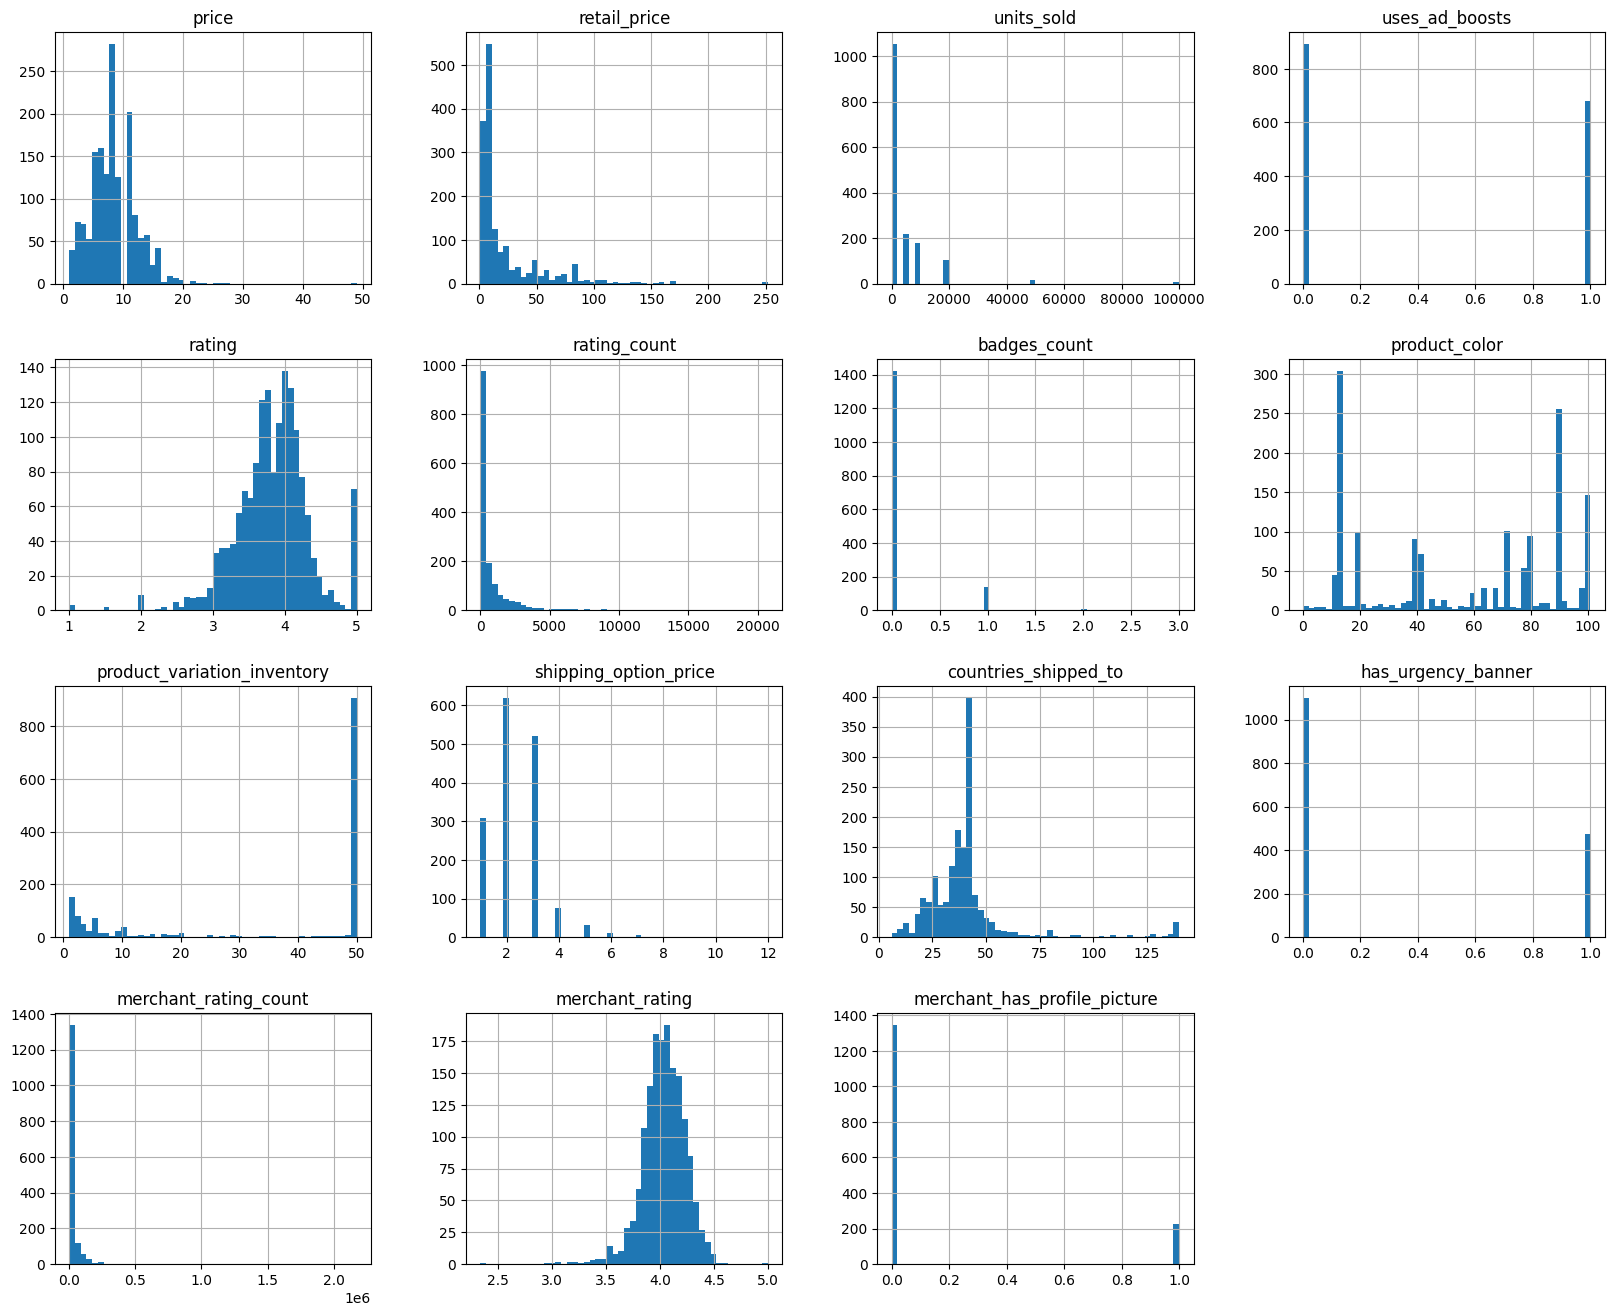

In [ ]:
import matplotlib.pyplot as plt
summer_product_dataset.hist(bins = 50, figsize=(20,16))
plt.show()

The data "units_sold" are currently too vary that it is imposible to use for training and predicting process.

Removing outlier (anomaly)

In [ ]:
import numpy as np
import scipy.stats as stats
def outlier_cols_ram(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    return col if (g_critical) < g_calculated else 0

In [ ]:
cols_with_outliers = []
for col in summer_product_dataset.columns:
    outlier_col = outlier_cols_ram(summer_product_dataset[col])
    cols_with_outliers.append(outlier_col)

while (cols_with_outliers.count(0)):
    cols_with_outliers.remove(0)
cols_with_outliers

['price',
 'retail_price',
 'units_sold',
 'rating',
 'rating_count',
 'badges_count',
 'shipping_option_price',
 'countries_shipped_to',
 'merchant_rating_count',
 'merchant_rating']

In [ ]:
for col in cols_with_outliers:
    summer_product_dataset[col] = (summer_product_dataset[col]**(1/3.7))

In [ ]:
any_outlier_col = []
for col in cols_with_outliers:
    outlier_col = outlier_cols_ram(summer_product_dataset[col])
    any_outlier_col.append(outlier_col)

while (any_outlier_col.count(0)):
    any_outlier_col.remove(0)
any_outlier_col

['price',
 'rating',
 'shipping_option_price',
 'merchant_rating_count',
 'merchant_rating']

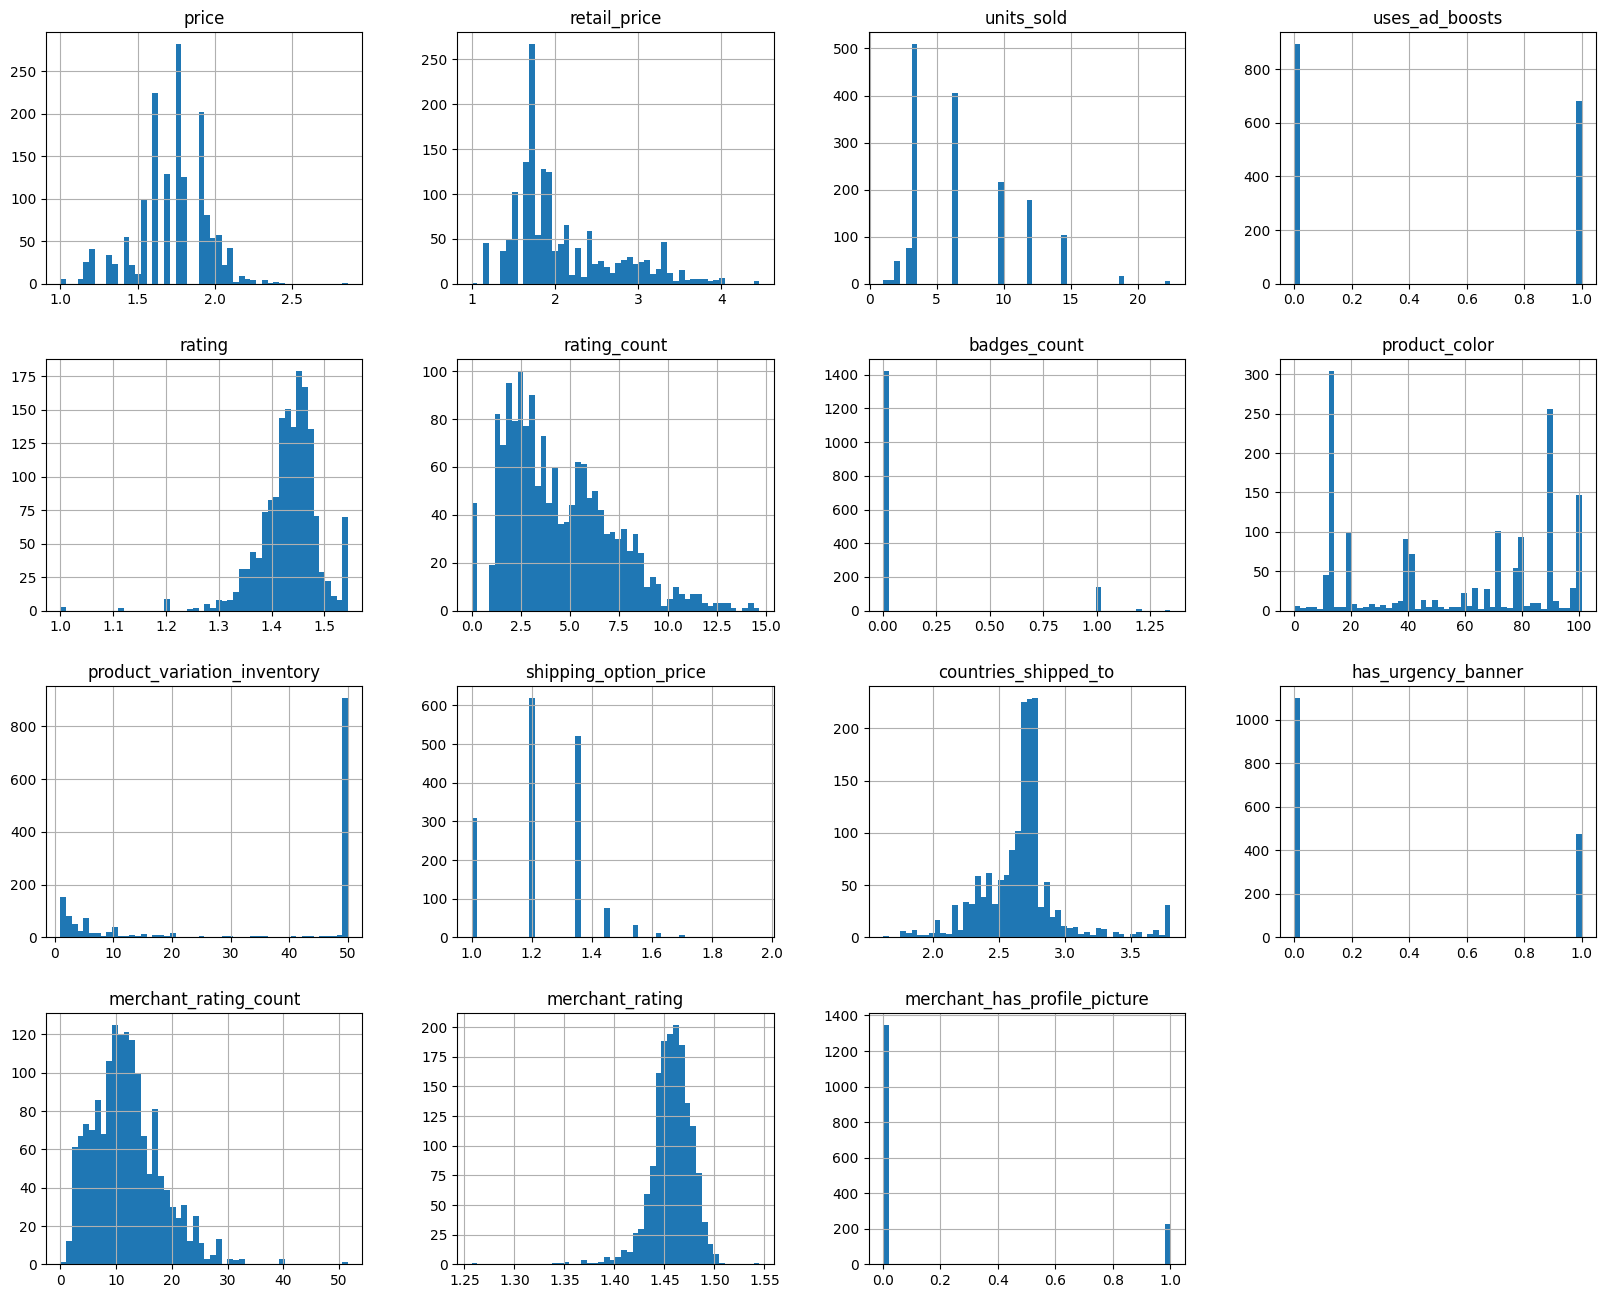

In [ ]:
summer_product_dataset.hist(bins = 50, figsize=(20,16))
plt.show()

In [ ]:
for i in summer_product_dataset['price']:
    if i >= 25:
        summer_product_dataset['price'] = summer_product_dataset['price'].replace(i, 25)
summer_product_dataset['price'].value_counts()

,count
price,
1.754197,282
1.911866,202
1.692018,129
1.810937,126
1.622972,120
...,...
1.148666,1
1.179159,1
1.426267,1


In [ ]:
for i in summer_product_dataset['merchant_rating']:
    if i <= 1.33:
        summer_product_dataset['merchant_rating'] = summer_product_dataset['merchant_rating'].replace(i, 1.33)
summer_product_dataset['merchant_rating'].value_counts()

,count
merchant_rating,
1.443049,15
1.458938,12
1.455175,9
1.464832,8
1.441340,8
...,...
1.443111,1
1.467860,1
1.485444,1


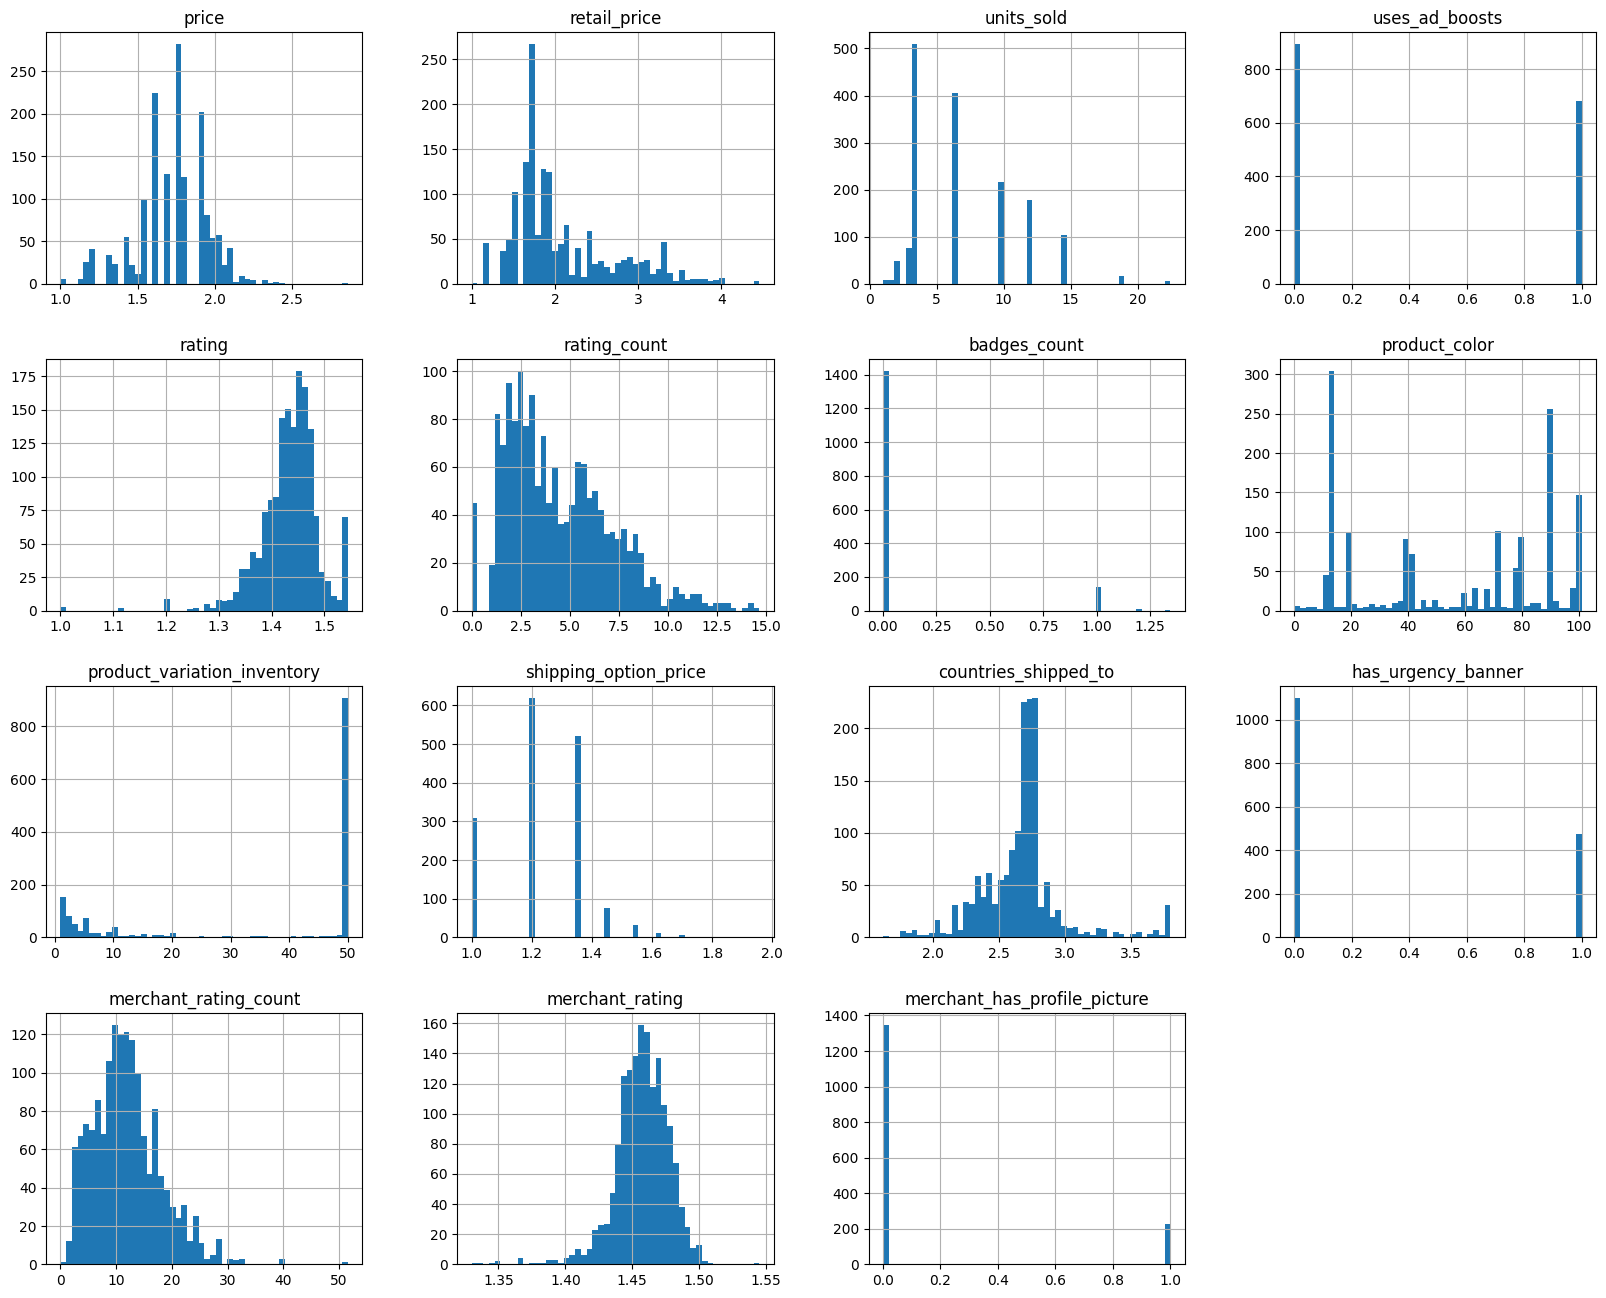

In [ ]:
summer_product_dataset.hist(bins = 50, figsize=(20,16))
plt.show()

In [ ]:
summer_product_dataset.to_csv('cleansed_summer_product_dataset.csv')

In [ ]:
summer_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   float64
 2   units_sold                    1573 non-null   float64
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_count                  1573 non-null   float64
 6   badges_count                  1573 non-null   float64
 7   product_color                 1573 non-null   int64  
 8   product_variation_inventory   1573 non-null   int64  
 9   shipping_option_price         1573 non-null   float64
 10  countries_shipped_to          1573 non-null   float64
 11  has_urgency_banner            1573 non-null   float64
 12  merchant_rating_count         1573 non-null   float64
 13  mer

In [ ]:
summer_product_dataset.isnull().sum()

,0
price,0
retail_price,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
product_color,0
product_variation_inventory,0
shipping_option_price,0


2.Process success_insight_dataset

In [ ]:
success_insight_dataset.isnull().sum()

,0
merchantid,0
listedproducts,0
totalunitssold,0
meanunitssoldperproduct,0
rating,0
merchantratingscount,0
meanproductprices,0
meanretailprices,0
averagediscount,0
meandiscount,0


In [ ]:
success_insight_dataset.head()

,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate
0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0
1,5708773c3c02161b3f8c7900,5,107100,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0
2,5417aada4ad3ab27e954b76c,2,100007,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN
3,570f3a713a698c14278bb51e,1,100000,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0
4,53082ea15aefb07dfe1f2a4f,1,100000,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN


In [ ]:
success_insight_dataset['totalurgencycount'] = success_insight_dataset['totalurgencycount'].fillna(0)
success_insight_dataset['urgencytextrate'] = success_insight_dataset['urgencytextrate'].fillna(0)

In [ ]:
success_insight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   merchantid               958 non-null    object 
 1   listedproducts           958 non-null    int64  
 2   totalunitssold           958 non-null    int64  
 3   meanunitssoldperproduct  958 non-null    float64
 4   rating                   958 non-null    float64
 5   merchantratingscount     958 non-null    float64
 6   meanproductprices        958 non-null    float64
 7   meanretailprices         958 non-null    float64
 8   averagediscount          958 non-null    float64
 9   meandiscount             958 non-null    float64
 10  meanproductratingscount  958 non-null    float64
 11  totalurgencycount        958 non-null    float64
 12  urgencytextrate          958 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 97.4+ KB


In [ ]:
success_insight_dataset.isnull().sum()

,0
merchantid,0
listedproducts,0
totalunitssold,0
meanunitssoldperproduct,0
rating,0
merchantratingscount,0
meanproductprices,0
meanretailprices,0
averagediscount,0
meandiscount,0


In [ ]:
success_insight_dataset.describe()[1:].T.style.background_gradient(cmap='GnBu', axis=1)

,mean,std,min,25%,50%,75%,max
listedproducts,1.641962,1.246183,1.000000,1.000000,1.000000,2.000000,15.000000
totalunitssold,7124.483299,14363.521893,1.000000,100.000000,1000.000000,10000.000000,120000.000000
meanunitssoldperproduct,4407.605428,9167.077812,1.000000,100.000000,1000.000000,5000.000000,100000.000000
rating,4.043994,0.222137,2.333000,3.931000,4.055500,4.190000,5.000000
merchantratingscount,22020.446764,84732.317971,0.000000,1373.000000,5990.500000,17238.500000,2174765.000000
meanproductprices,8.634906,3.987599,1.000000,6.000000,8.000000,11.000000,49.000000
meanretailprices,24.802265,30.258719,1.000000,7.000000,11.000000,28.875000,252.000000
averagediscount,28.721294,39.918708,-18.000000,-10.000000,16.000000,71.000000,97.000000
meandiscount,28.698017,39.914269,-18.000000,-10.000000,16.000000,71.000000,97.000000
meanproductratingscount,922.538622,1925.750178,0.000000,31.000000,210.500000,920.750000,20744.000000
